# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [141]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [142]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [143]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [144]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [145]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [146]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.5,99,1.0
1,2023-01-01T01:00,10.4,98,0.1
2,2023-01-01T02:00,10.3,96,0.0
3,2023-01-01T03:00,9.7,95,0.0
4,2023-01-01T04:00,9.0,95,0.0


In [147]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [148]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\cygwin64\tmp\ipykernel_84676\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [149]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.319048,86.267857,0.136905
std,3.525764,12.804132,0.431063
min,0.400000,45.000000,0.000000
25%,5.875000,81.000000,0.000000
50%,8.200000,90.000000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


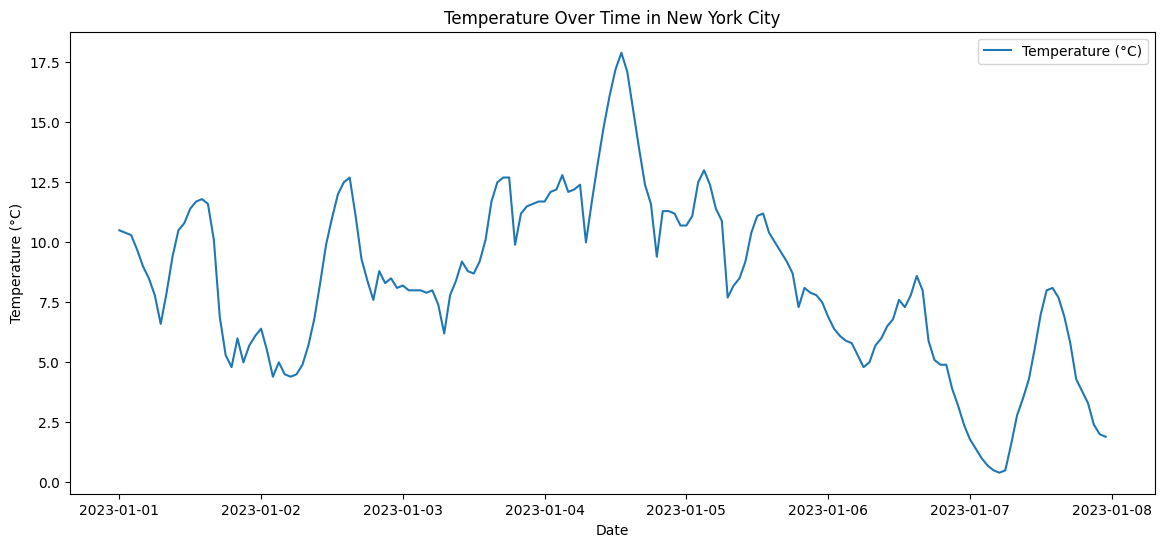

In [150]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

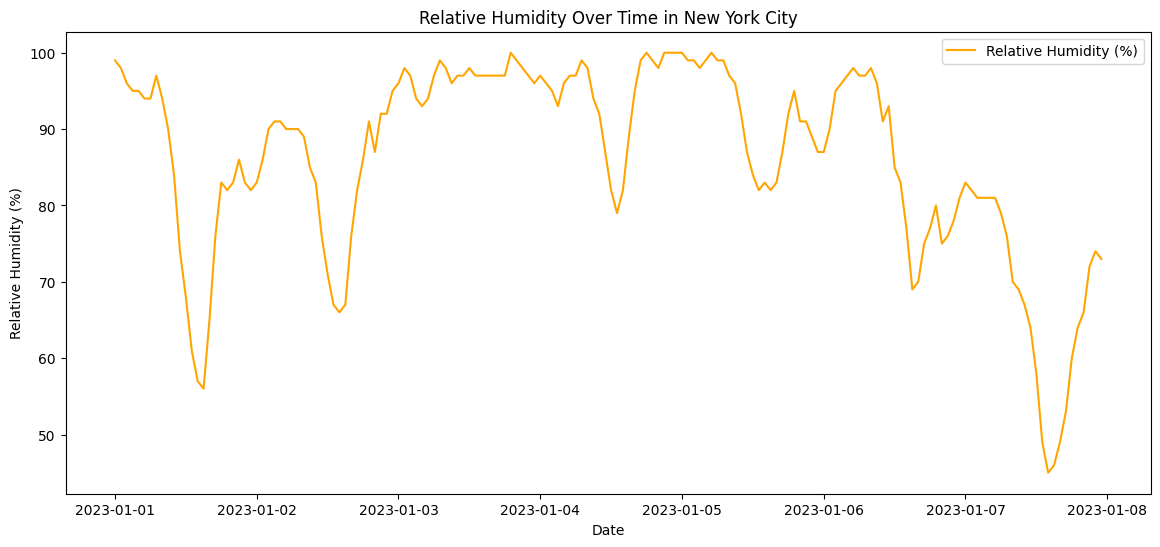

In [151]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


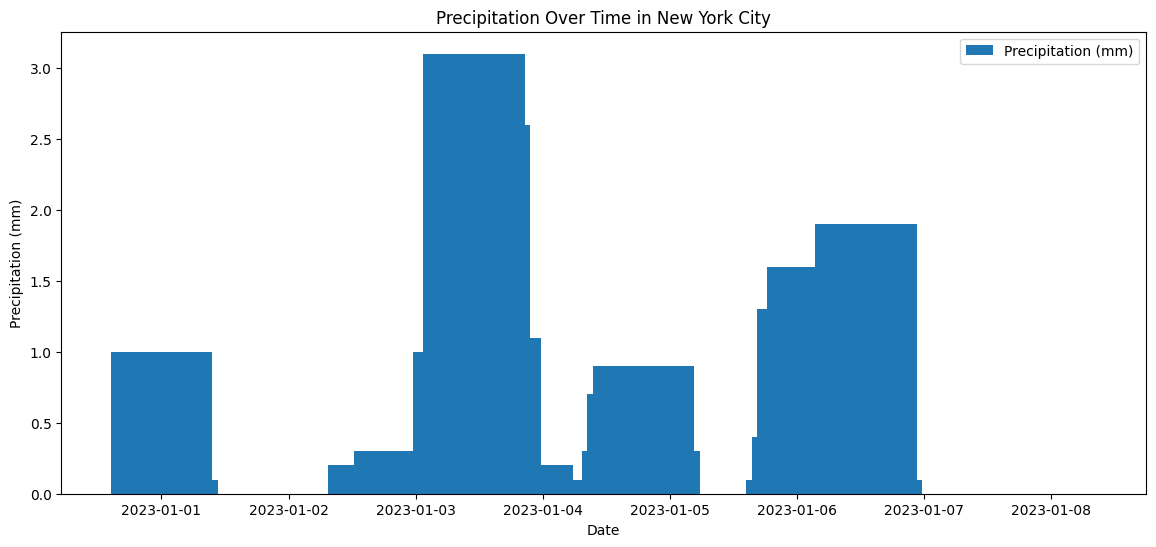

In [152]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [153]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


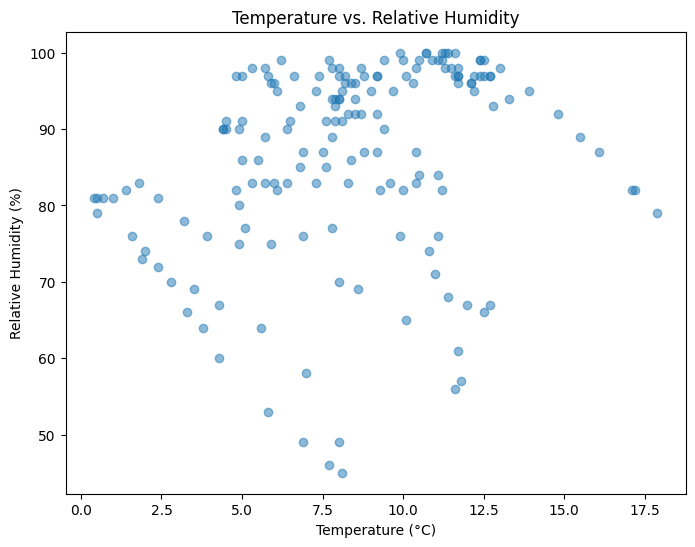

In [154]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [155]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.658333,83.000000,0.045833
2023-01-02,7.858333,84.000000,0.025000
2023-01-03,9.558333,96.916667,0.391667
2023-01-04,12.954167,94.333333,0.095833
2023-01-05,9.783333,92.125000,0.000000


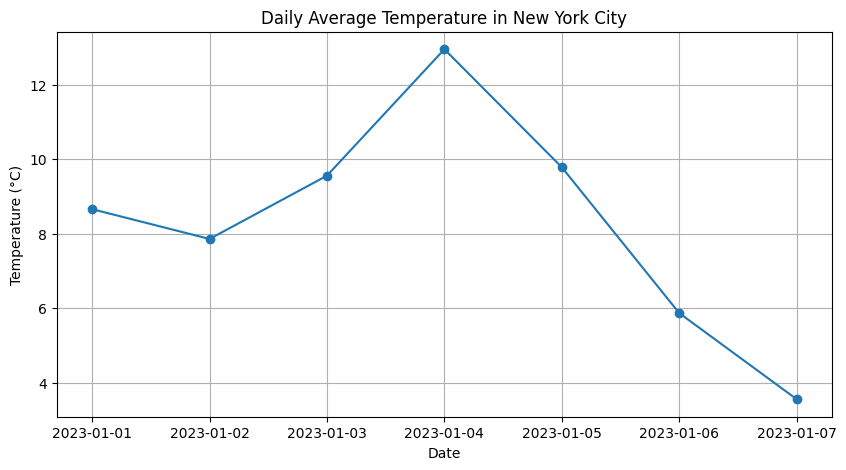

In [156]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [157]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\cygwin64\tmp\ipykernel_84676\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [158]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [159]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


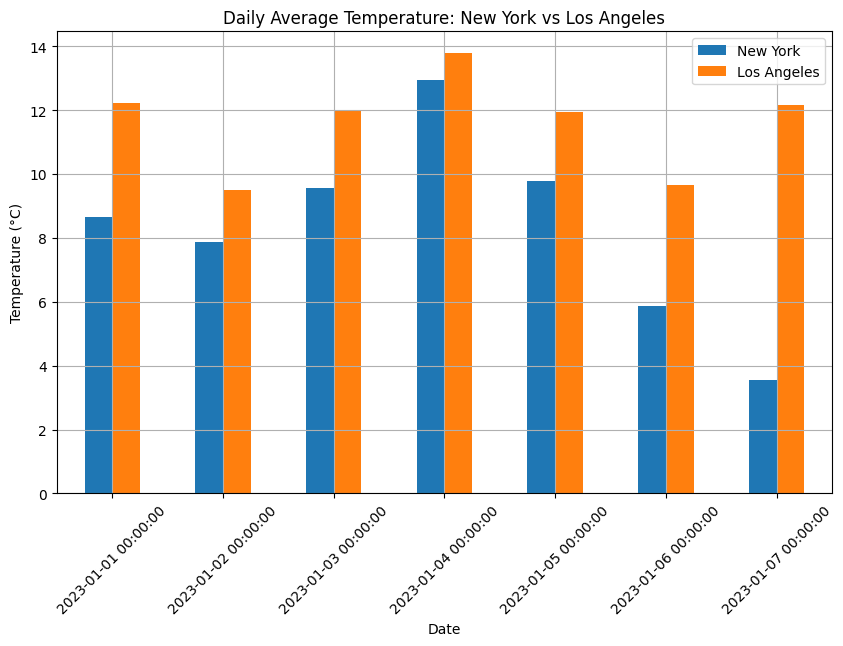

In [160]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [161]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.658333,12.233333,3.575000
2023-01-02,7.858333,9.495833,1.637500
2023-01-03,9.558333,11.970833,2.412500
2023-01-04,12.954167,13.775000,0.820833
2023-01-05,9.783333,11.950000,2.166667
2023-01-06,5.866667,9.662500,3.795833
2023-01-07,3.554167,12.154167,8.600000


In [162]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [163]:
# Location coordinates for London 
latitude_lon = 51.5074 
longitude_lon = -0.1278

params_lon = {
    'latitude': latitude_lon,
    'longitude': longitude_lon,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'GMT+0'
}

# Location coordinates for Seattle
latitude_sea = 47.6062 
longitude_sea = -122.3321

params_sea = {
    'latitude': latitude_sea,
    'longitude': longitude_sea,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

In [164]:
response_lon = requests.get(base_url, params=params_lon)
# Check if the request was successful

if response_lon.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_lon.status_code}')

response_sea = requests.get(base_url, params=params_sea)
# Check if the request was successful

if response_lon.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_sea.status_code}')

Data fetched successfully!
Data fetched successfully!


In [188]:
# Change the responses to DataFrame
data_lon = response_lon.json()
data_sea = response_sea.json()
hourly_data_lon = data_lon['hourly']
hourly_data_sea = data_sea['hourly']

df_lon = pd.DataFrame(hourly_data_lon)
df_sea = pd.DataFrame(hourly_data_sea)

In [189]:
df_lon.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,11.3,94,0.1
1,2023-01-01T01:00,12.0,85,0.4
2,2023-01-01T02:00,11.1,80,0.0
3,2023-01-01T03:00,10.5,78,0.0
4,2023-01-01T04:00,10.3,77,0.0


In [191]:
df_sea.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,3.9,95,0.5
1,2023-01-01T01:00,3.5,98,0.0
2,2023-01-01T02:00,2.8,98,0.0
3,2023-01-01T03:00,2.6,98,0.0
4,2023-01-01T04:00,4.7,97,0.0


In [193]:
# Change the time column to datetime
df_lon['time'] = pd.to_datetime(df_lon['time'])
df_sea['time'] = pd.to_datetime(df_sea['time'])

In [194]:
# Make the time column the index 
df_lon.set_index('time',inplace=True)
df_sea.set_index('time',inplace=True)
df_lon.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01 00:00:00,11.3,94,0.1
2023-01-01 01:00:00,12.0,85,0.4
2023-01-01 02:00:00,11.1,80,0.0
2023-01-01 03:00:00,10.5,78,0.0
2023-01-01 04:00:00,10.3,77,0.0


In [196]:
df_sea.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01 00:00:00,3.9,95,0.5
2023-01-01 01:00:00,3.5,98,0.0
2023-01-01 02:00:00,2.8,98,0.0
2023-01-01 03:00:00,2.6,98,0.0
2023-01-01 04:00:00,4.7,97,0.0


In [197]:
# Calculate percentage of missing data
missing_pctg_lon = df_lon.isnull().sum()/len(df_lon) * 100
missing_pctg_sea = df_sea.isnull().sum()/len(df_sea) * 100

In [198]:
# Summarize the missing data
summaty_df_lon = pd.DataFrame({'Missing Percentage':missing_pctg_lon})
summaty_df_sea = pd.DataFrame({'Missing Percentage':missing_pctg_sea})

In [199]:
print(summaty_data_lon)

                       Missing Percentage
latitude                              0.0
longitude                             0.0
utc_offset_seconds                    0.0
timezone                              0.0
timezone_abbreviation                 0.0
elevation                             0.0
hourly_units                          0.0
hourly                                0.0


In [200]:
print(summaty_data_sea)

                       Missing Percentage
latitude                              0.0
longitude                             0.0
utc_offset_seconds                    0.0
timezone                              0.0
timezone_abbreviation                 0.0
elevation                             0.0
hourly_units                          0.0
hourly                                0.0


No missing values

In [204]:
# Handle missing data, if any, with fill forward
df_lon.ffill(inplace=True)
df_sea.ffill(inplace=True)

In [207]:
#Summary Statistic
df_lon.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,9.508929,86.744048,0.086905
std,2.715730,5.168997,0.195322
min,1.000000,73.000000,0.000000
25%,8.075000,83.000000,0.000000
50%,10.200000,87.000000,0.000000
75%,11.325000,90.000000,0.100000
max,13.100000,97.000000,1.000000


In [208]:
#Summary Statistic
df_sea.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,5.780952,77.875000,0.088095
std,2.628425,14.342344,0.189487
min,0.100000,49.000000,0.000000
25%,3.700000,66.000000,0.000000
50%,6.250000,79.000000,0.000000
75%,7.625000,91.000000,0.100000
max,11.600000,98.000000,1.200000


In [209]:
# Resample data to weekly totals
weekly_df_lon = df_lon.resample('W').sum()
weekly_df_sea = df_sea.resample('W').sum()

In [214]:
weekly_df_lon.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,247.5,1993,4.0
2023-01-08,1350.0,12580,10.6


In [211]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'London': weekly_df_lon['precipitation'],
    'Seattle': weekly_df_sea['temperature_2m']
})

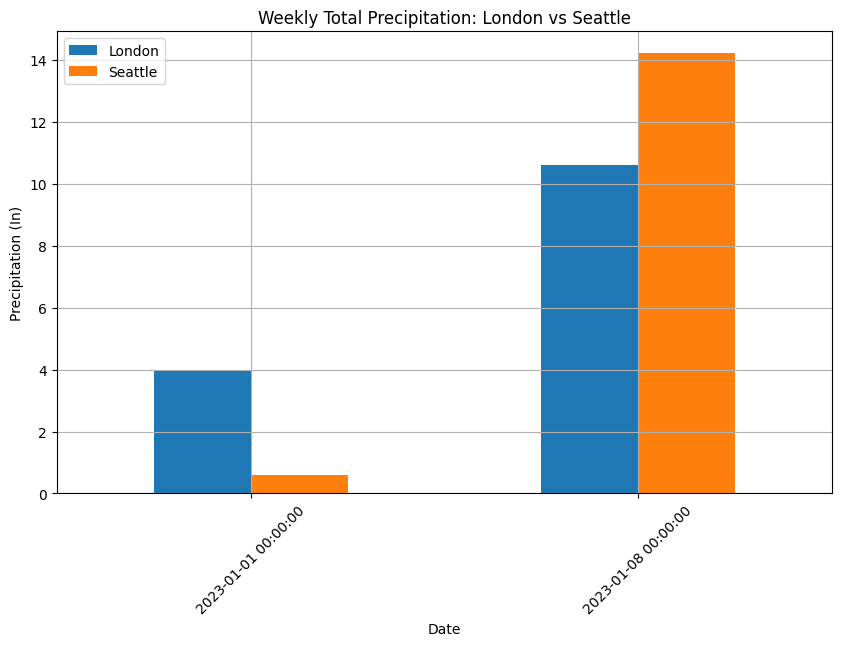

In [212]:
# Plot Comparison of Weekly Total Precipitation

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Total Precipitation: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (In)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The data only contains two weeks of values when totaled by week. Hard to tell of any significant pattern. One interesting thing is that both cities experienced more than double rain amount from week one to week two. 

In [215]:
# Save Data to CSV (Optional)

# Save London data
df_lon.to_csv('london_weather.csv')

# Save Seattle data
df_sea.to_csv('seattle_weather.csv')